# **Optimizing Surgical Scheduling: A Data-Driven Approach**

## **Project Content** <a id = 0></a>

### First Step: First Organization

1. [Introduction](#1)
2. [Load The Relevant Libraries and Packages](#2)

### Second Step: Data Preprocessing

3. [Load and Preprocess The Dataset](#3)

### Third Step: Data Analysis

4. [Check out the Statistics of the Categorical and the Numeric Features of The Dataset](#4)
5. [Check out the Relation between the Glucose Tests (FPG and 2hrPG) to Evaluate the BMI and HbA1c Features](#5)
6. [Check out the Relation between the Age and Total Glucose to Evaluate the Diabetes Status](#6)

### Forth and Final Step: Modeling and Examination

7. [Factorize the Categorical Features](#7)
8. [Split the Dataset into the Train and Test Sets and then Create a Vector of the Input and Output Variables](#8)
9. [Define the Logistic Regression Model and Check Its Performance](#9)
10. [Define the CARET Model and Check its Performance](#10)
11. [Define the Random Forest Model and Check Its Performance](#10)

***

# First Step: First Organization

***

## 1. Introduction <a id = 1></a>

### **Problem Explanation**

<div style="text-align: justify">
The escalating prevalence of prediabetes (preDM) and diabetes mellitus (DM) among youth, coupled with the underdiagnosis of these conditions, underscores a critical need for robust and accessible screening tools. Existing pediatric clinical screening guidelines, including those endorsed by the American Diabetes Association (ADA) and the American Academy of Pediatrics (AAP), reveal limitations in accurately identifying youth with preDM/DM based on biomarker criteria. The variations in guideline performance across demographic subgroups, such as age, sex, and race/ethnicity, further complicate the identification of high-risk populations.
</div>
</br>
<div style="text-align: justify">
Addressing these limitations, the study advocates for the development of an advanced, data-driven screening tool using machine learning (ML) methods, encompassing a broader spectrum of clinical and behavioral health data. This tool aims to overcome the current deficiencies and accurately identify youth at risk for preDM/DM, acknowledging the multifaceted factors influencing diabetes risk beyond weight status. The overarching goal is to create a comprehensive and inclusive screener, ensuring widespread implementation to identify at-risk youth and guide them toward tailored preventive interventions.
</div>

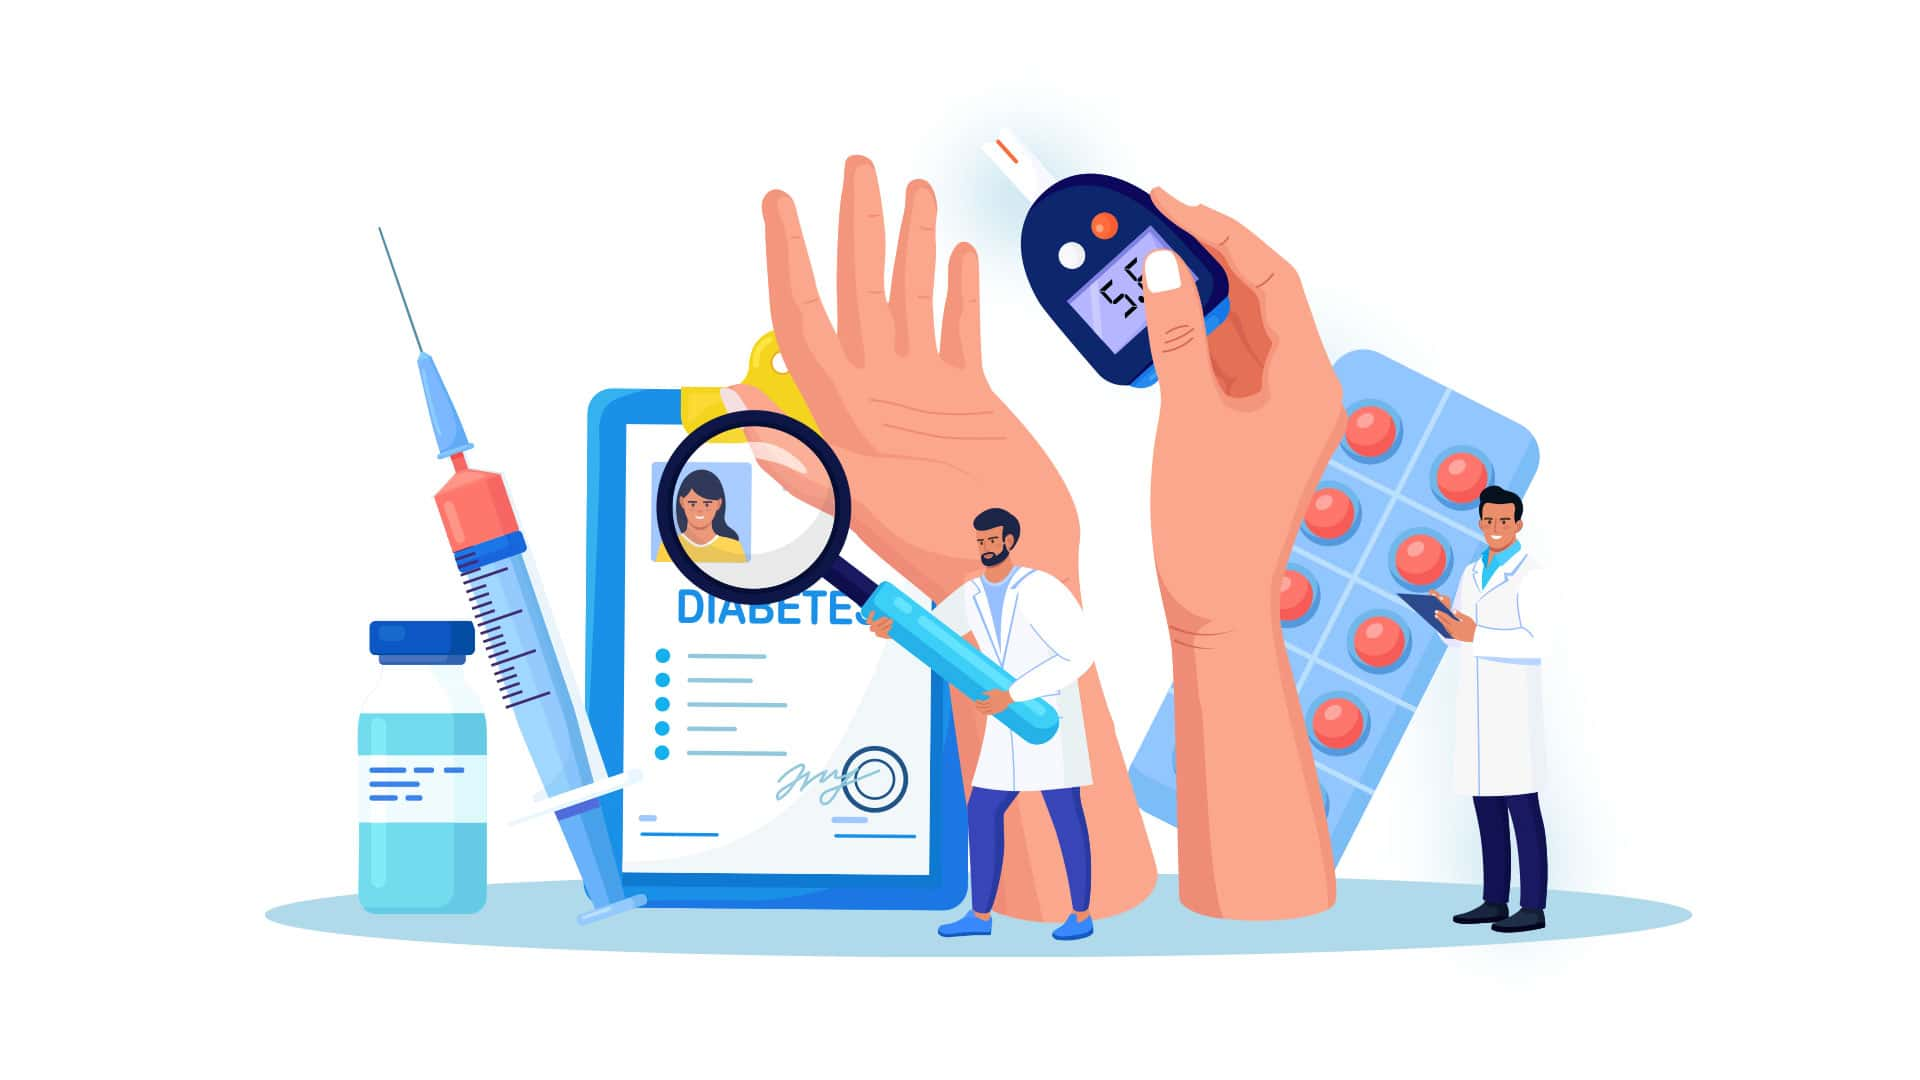

[Project Content](#0)

## 2. Load The Relevant Libraries and Packages <a id = 2></a>

In [2]:
# Data manipulation and transformation
library(tidymodels)   # Importing the tidymodels library for tidy modeling framework
library(magrittr)     # Importing the magrittr library for better control over data pipelines

# Data visualization
library(ggplot2)      # Importing ggplot2 for comprehensive plotting capabilities

# Machine learning and predictive modeling
library(caTools)      # Importing caTools for tools related to classification and regression tasks
library(caret)        # Importing caret for a comprehensive machine learning toolkit
library(rpart)        # Importing rpart for Recursive Partitioning in decision trees
library(rpart.plot)   # Importing rpart.plot for plotting trees generated by rpart
library(randomForest) # Importing randomForest for classification and regression tasks
library(dplyr)        # Importing dplyr for data manipulation and transformation

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tibble       3.2.1
✔ dplyr        1.1.4     ✔ tidyr        1.3.0
✔ infer        1.0.5     ✔ tune         1.1.2
✔ modeldata    1.2.0     ✔ workflows    1.1.3
✔ parsnip      1.1.1     ✔ workflowsets 1.0.1
✔ purrr        1.0.2     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Dig deeper into tidy modeling with R at https://www.tmwr.org


Attaching package: ‘magrittr’


The following object is masked from ‘package:tidyr’:

    extract


The following object is masked from ‘package:purrr’:

    set_names


Loading required package: lattice


Attaching package: ‘caret’


The following objects are m

[Project Content](#0)

***

# Second Step: Data Preprocessing

***

## 3. Load and Preprocess the Dataset <a id = 3></a>

In [3]:
# Read the Earning.csv file into a data frame.
df <- read.csv("./Datasets/final_dataset.csv")

# Print the dimensions of the dataset.
cat("The final dataset's shape:", dim(df), "\n")

# Display the first few rows of the dataset.
head(df, 5)

The final dataset's shape: 2730 16 


,ID,Gender,Age,Race,BMI,Systolic.BP,Diastolic.BP,FPG,X2hrPG,HbA1c,Total.Cholestrol,Diabetes.Risk,BMI.Percentile,Hypertension,ADA.Biomarker.Label,ADA.Screening.Label
,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,31133,2,16,2,16.79,120,58,84,122,4.7,147,2,3.63,0,0,0
2,31148,2,16,1,18.28,106,42,91,69,5.0,126,2,11.17,0,0,0
3,31206,2,17,4,21.27,110,66,93,82,4.7,180,1,37.62,0,0,0
4,31211,2,17,1,23.27,108,72,79,96,5.4,178,2,54.30,0,0,0
5,31237,1,12,3,32.01,120,50,103,111,4.9,175,1,89.14,0,1,1


Check whether the dataset contains any missing values.

In [4]:
# Function to calculate the percentage of non-missing values.
percentage_non_missing <- function(x) {
  mean(!is.na(x)) * 100
}

# Apply the function to each column in the dataframe.
non_missing_percentages <- sapply(df, percentage_non_missing)

# Create a new dataframe to store the results without row names.
result_df <- data.frame(
  Feature = names(df),
  Non_Missing_Percentage = non_missing_percentages,
  row.names = NULL
)

# Print the results.
result_df

Feature,Non_Missing_Percentage
<chr>,<dbl>
ID,100
Gender,100
Age,100
Race,100
BMI,100
Systolic.BP,100
Diastolic.BP,100
FPG,100
X2hrPG,100


There is no missing values in the current dataset.

[Project Content](#0)

***

# Third Step: Exploratory Data Analysis

***

## 4. Check out the Statistics of the Categorical and the Numeric Features of The Dataset <a id = 4></a>

Firstly, extract the features names from the df.

In [5]:
# Extract column names from the dataframe.
features <- names(df)

# Display the extracted column names.
features

[1] "ID"                  "Gender"              "Age"                
 [4] "Race"                "BMI"                 "Systolic.BP"        
 [7] "Diastolic.BP"        "FPG"                 "X2hrPG"             
[10] "HbA1c"               "Total.Cholestrol"    "Diabetes.Risk"      
[13] "BMI.Percentile"      "Hypertension"        "ADA.Biomarker.Label"
[16] "ADA.Screening.Label"

Next, generate two lists: one for categorical features and the other for numeric features.

In [6]:
# Define categorical features.
cat_features <- c("Gender", "Race", "Diabetes.Risk", "Hypertension", "ADA.Biomarker.Label", "ADA.Screening.Label")

# Identify numeric features, excluding specific columns.
num_features <- setdiff(features, cat_features)
num_features <- num_features[num_features != "ID"]

# Display categorical features.
cat("Categorical features:")
cat("\n")
cat(cat_features)

cat("\n\n")

# Display numeric features.
cat("Numeric features:")
cat("\n")
cat(num_features)

Categorical features:
Gender Race Diabetes.Risk Hypertension ADA.Biomarker.Label ADA.Screening.Label

Numeric features:
Age BMI Systolic.BP Diastolic.BP FPG X2hrPG HbA1c Total.Cholestrol BMI.Percentile

It Seems well. Now it's the time to check out the values of both the categorical and numeric features.

In [7]:
# Function to create a summary table for categorical features.
cat_summary_table <- function(dataframe, categorical_features) {
  
  # Create an empty data frame to store the results
  summary_table <- data.frame(
    Feature = character(),
    Unique_Values = character(),
    Percentage = numeric(),
    stringsAsFactors = FALSE
  )
  
  # Loop through each specified feature
  for (feature in categorical_features) {
    # Extract unique values and their counts for the current feature
    value_counts <- table(dataframe[[feature]])
    
    # Calculate percentages
    percentages <- round(prop.table(value_counts) * 100, 0)
    
    # Append information to the table data frame
    summary_table <- rbind(summary_table, data.frame(
      Feature = rep(feature, length(value_counts)),
      Unique_Values = as.character(names(value_counts)),
      Percentage = as.numeric(percentages)
    ))
  }

  # Remove duplicate feature names, leaving only one occurrence
  feature_feature <- c(summary_table$Feature)
  feature_feature[duplicated(feature_feature)] <- ""
  summary_table$Feature <- feature_feature

  # Return the resulting table
  return(summary_table)
}

# Generate and display the summary table
summary_table <- cat_summary_table(df, cat_features)
summary_table

Feature,Unique_Values,Percentage
<chr>,<chr>,<dbl>
Gender,1,53
,2,47
Race,1,28
,2,26
,3,37
,4,9
Diabetes.Risk,1,11
,2,89
Hypertension,0,99


Based on the infromation above, we can understand the distribution of the dataset based on its features.</br>
The most important statistics of these features are also shown in the table.

In [8]:
# Function to create a summary table for numeric features.
num_summary_table <- function(dataframe, numeric_features) {

  # Extract the numeric columns from the dataframe
  numeric_data <- dataframe[numeric_features]

  # Compute summary statistics
  summary_stats <- data.frame(
    Feature = character(),
    Min = numeric(),
    Q1 = numeric(),
    Mean = numeric(),
    Median = numeric(),
    Q3 = numeric(),
    Max = numeric(),
    stringsAsFactors = FALSE
  )

  for (feature in numeric_features) {
    summary_stats <- rbind(
      summary_stats,
      c(
        Feature = feature,
        Min = round(min(numeric_data[[feature]], na.rm = TRUE), 2),
        Q1 = round(quantile(numeric_data[[feature]], 0.25, na.rm = TRUE), 2),
        Mean = round(mean(numeric_data[[feature]], na.rm = TRUE), 2),
        Median = round(median(numeric_data[[feature]], na.rm = TRUE), 2),
        Q3 = round(quantile(numeric_data[[feature]], 0.75, na.rm = TRUE), 2),
        Max = round(max(numeric_data[[feature]], na.rm = TRUE), 2)
      )
    )
  }

  # Set the column names for the summary dataframe
  colnames(summary_stats) <- c("Feature", "Min", "Q1", "Mean", "Median", "Q3", "Max")

  return(summary_stats)
}

# Generate and display the summary table for numeric features
summary_table <- num_summary_table(df, num_features)
summary_table

Feature,Min,Q1,Mean,Median,Q3,Max
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Age,12,14,15.47,15,17,19
BMI,13.3,19.9,24.25,22.64,27.2,68.6
Systolic.BP,76,104,110.58,110,118,154
Diastolic.BP,0,52,59.05,60,66,96
FPG,61,89,94.28,94,99,254
X2hrPG,31,82,97.94,96,110,222
HbA1c,4,5,5.21,5.2,5.4,9.5
Total.Cholestrol,66,136,156.77,154,174,332
BMI.Percentile,0.04,25.15,50.02,50.01,75.07,100


Since the minimum Diastolic Blood Pressure cannot be less than 4, omitting the records with less than this value is recommended.

In [9]:
df <- df[df$Diastolic.BP >= 4,]

Let's revisit the statistics of the numeric features.

In [10]:
# Function to create a summary table for numeric features.
num_summary_table <- function(dataframe, numeric_features) {

  # Extract the numeric columns from the dataframe
  numeric_data <- dataframe[numeric_features]

  # Compute summary statistics
  summary_stats <- data.frame(
    Feature = character(),
    Min = numeric(),
    Q1 = numeric(),
    Mean = numeric(),
    Median = numeric(),
    Q3 = numeric(),
    Max = numeric(),
    stringsAsFactors = FALSE
  )

  for (feature in numeric_features) {
    summary_stats <- rbind(
      summary_stats,
      c(
        Feature = feature,
        Min = round(min(numeric_data[[feature]], na.rm = TRUE), 2),
        Q1 = round(quantile(numeric_data[[feature]], 0.25, na.rm = TRUE), 2),
        Mean = round(mean(numeric_data[[feature]], na.rm = TRUE), 2),
        Median = round(median(numeric_data[[feature]], na.rm = TRUE), 2),
        Q3 = round(quantile(numeric_data[[feature]], 0.75, na.rm = TRUE), 2),
        Max = round(max(numeric_data[[feature]], na.rm = TRUE), 2)
      )
    )
  }

  # Set the column names for the summary dataframe
  colnames(summary_stats) <- c("Feature", "Min", "Q1", "Mean", "Median", "Q3", "Max")

  return(summary_stats)
}

# Generate and display the summary table for numeric features
summary_table <- num_summary_table(df, num_features)
summary_table

Feature,Min,Q1,Mean,Median,Q3,Max
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Age,12,14,15.49,16,17,19
BMI,13.3,19.9,24.27,22.69,27.2,68.6
Systolic.BP,76,104,110.6,110,118,154
Diastolic.BP,12,52,59.71,60,68,96
FPG,61,89,94.27,94,99,254
X2hrPG,31,82,97.82,96,110,222
HbA1c,4,5,5.21,5.2,5.4,9.5
Total.Cholestrol,66,136,156.74,154,174,320
BMI.Percentile,0.04,25.15,50.15,50.38,75.07,100


## 5. Check out the Relation between the Glucose Tests (FPG and 2hrPG) to Evaluate the BMI and HbA1c Features <a id = 5></a>

To gain better insights from the data, plot the data points for Glucose tests, depicting the relationships with HbA1c and BMI features.

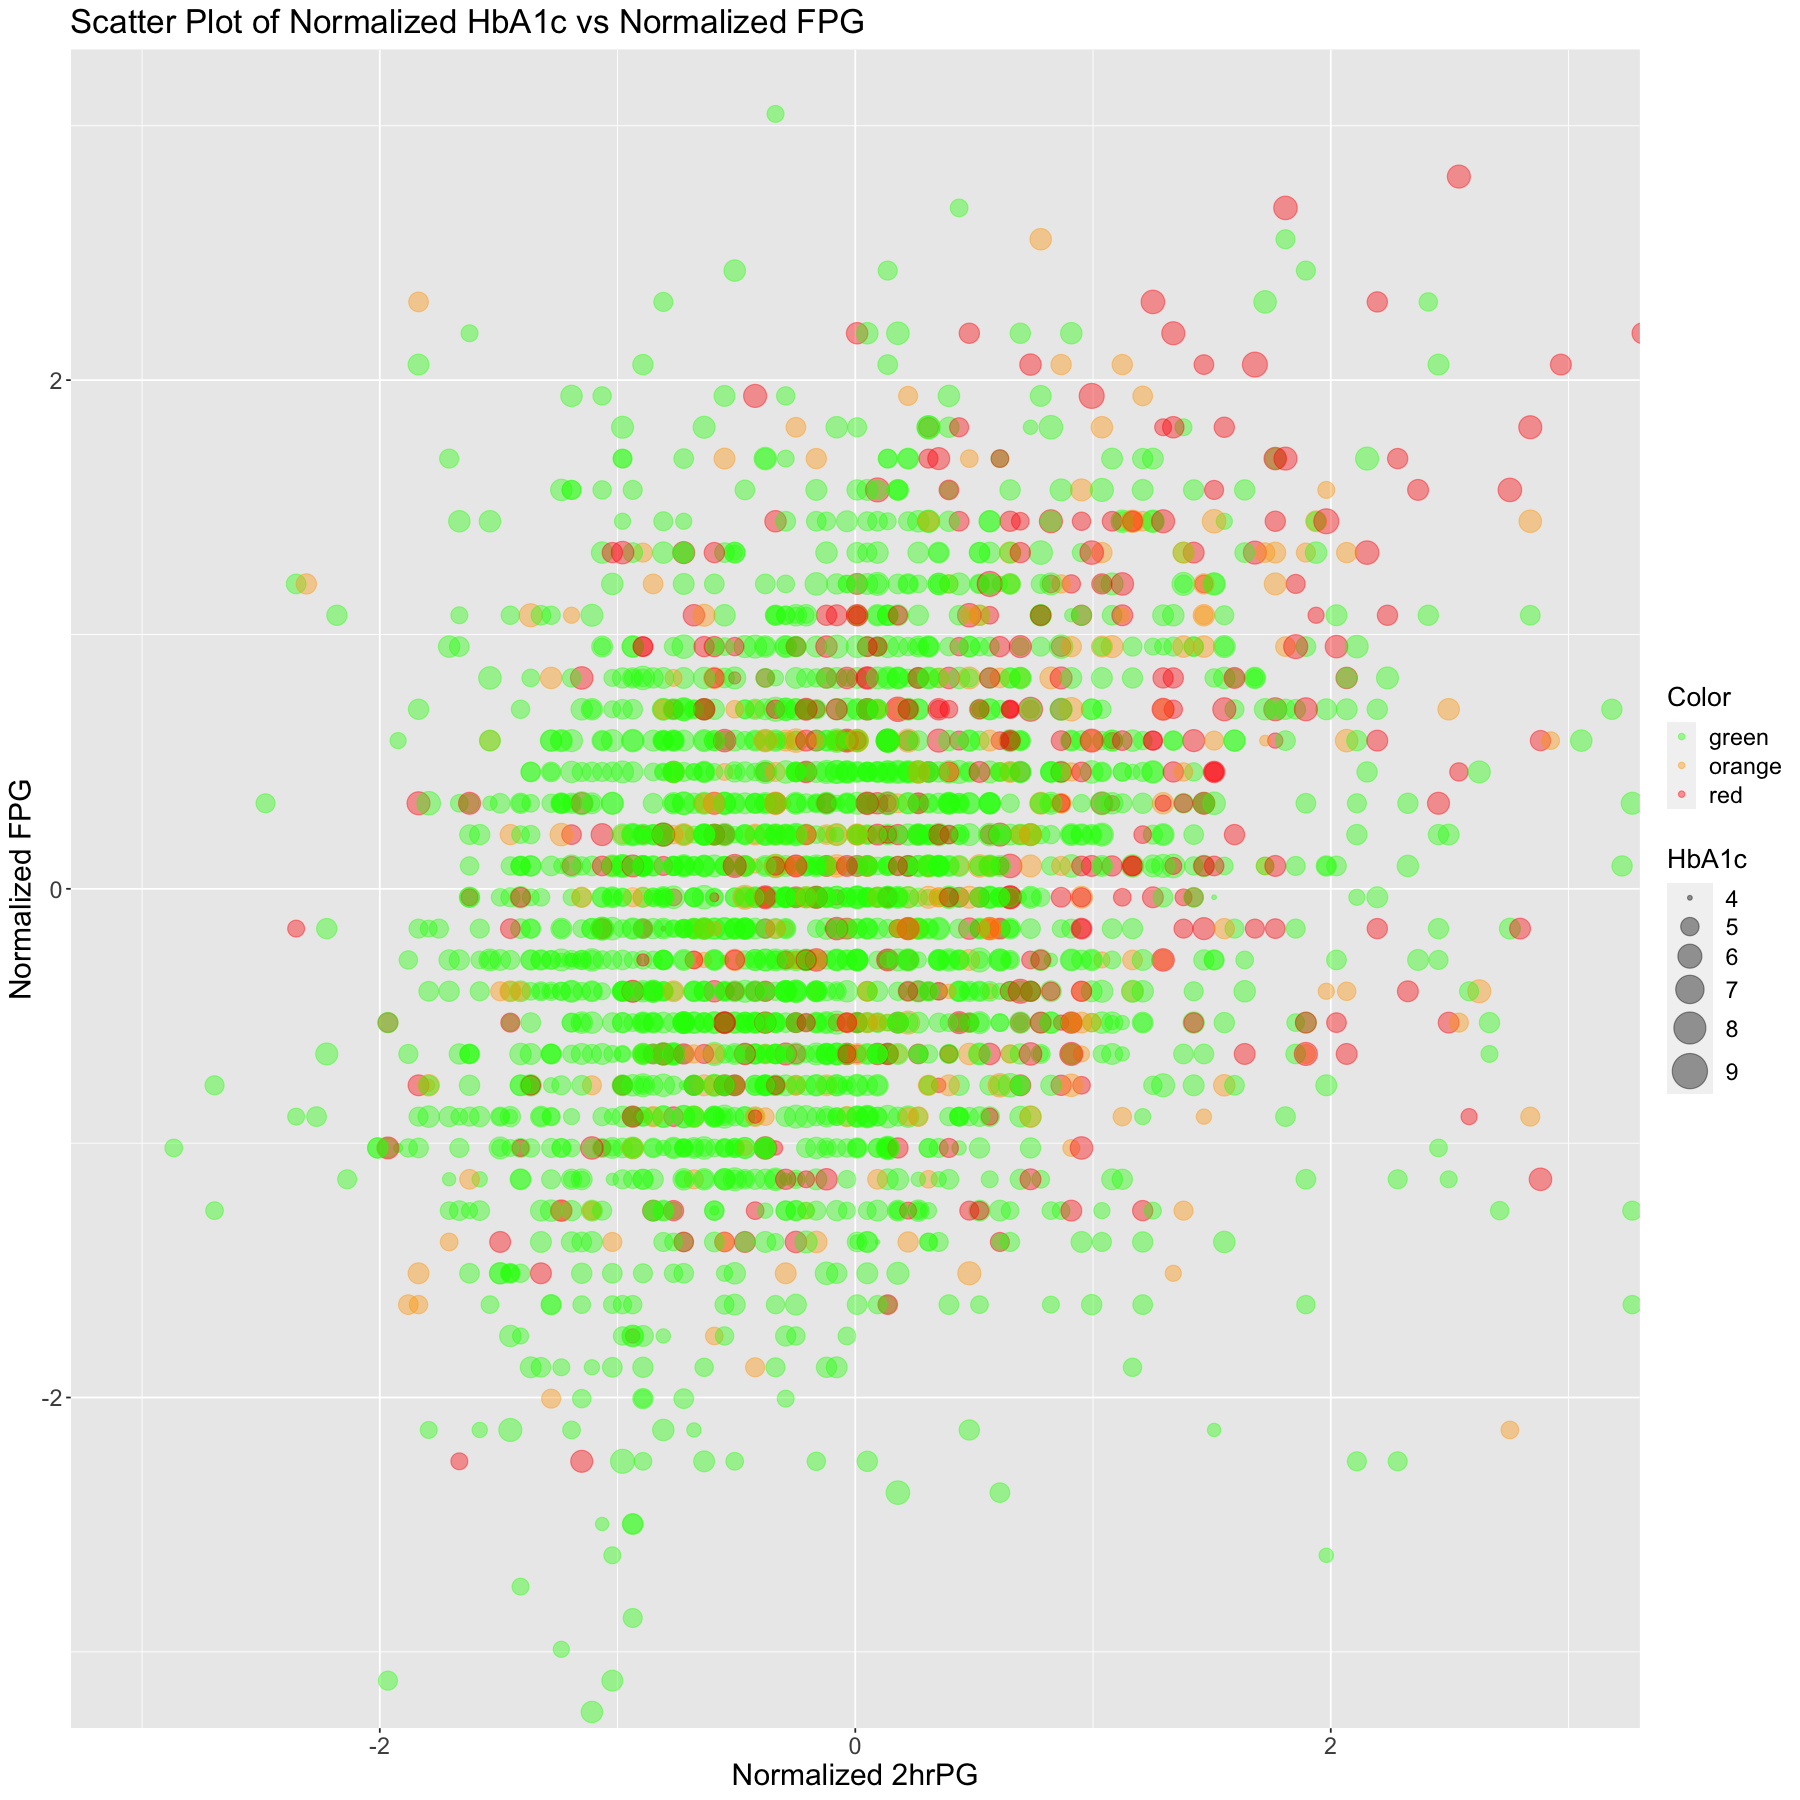

In [11]:
# Set the options for the plot size.
options(
  repr.plot.width = 15,
  repr.plot.height = 15)

# Load necessary libraries
library(ggplot2)

# Create a new column 'Color' based on BMI.Percentile
df$Color <- cut(df$BMI.Percentile, breaks = c(-Inf, 75, 85, Inf),
                labels = c("green", "orange", "red"))

# Scatter plot with normalized values and limited axis range
ggplot(df, aes(x = scale(X2hrPG), y = scale(FPG), color = Color, size = HbA1c)) +
  
  geom_point(alpha = 0.4) +
  
  scale_color_manual(values = c("green", "orange", "red")) +
  scale_size_continuous(range = c(1, 10)) +
  
  labs(title = "Scatter Plot of Normalized HbA1c vs Normalized FPG",
       x = "Normalized 2hrPG",
       y = "Normalized FPG") +
  
  coord_cartesian(xlim = c(-3, 3), ylim = c(-3, 3)) +
  
  # Increase text size
  theme(
    text = element_text(size = 16),  # You can adjust the size as needed
    axis.title = element_text(size = 18),
    axis.text = element_text(size = 14),
    legend.text = element_text(size = 14),
    legend.title = element_text(size = 16),
    plot.title = element_text(size = 20)
  )

# Remove the 'Color' column from the dataframe
df <- subset(df, select = -Color)

## 6. Check out the Relation between the Age and Total Glucose to Evaluate the Diabetes Status  <a id = 6></a>

To gain better insights from the data, plot the data points of Total Cholesterol values against Age, displaying their Diabetes status.

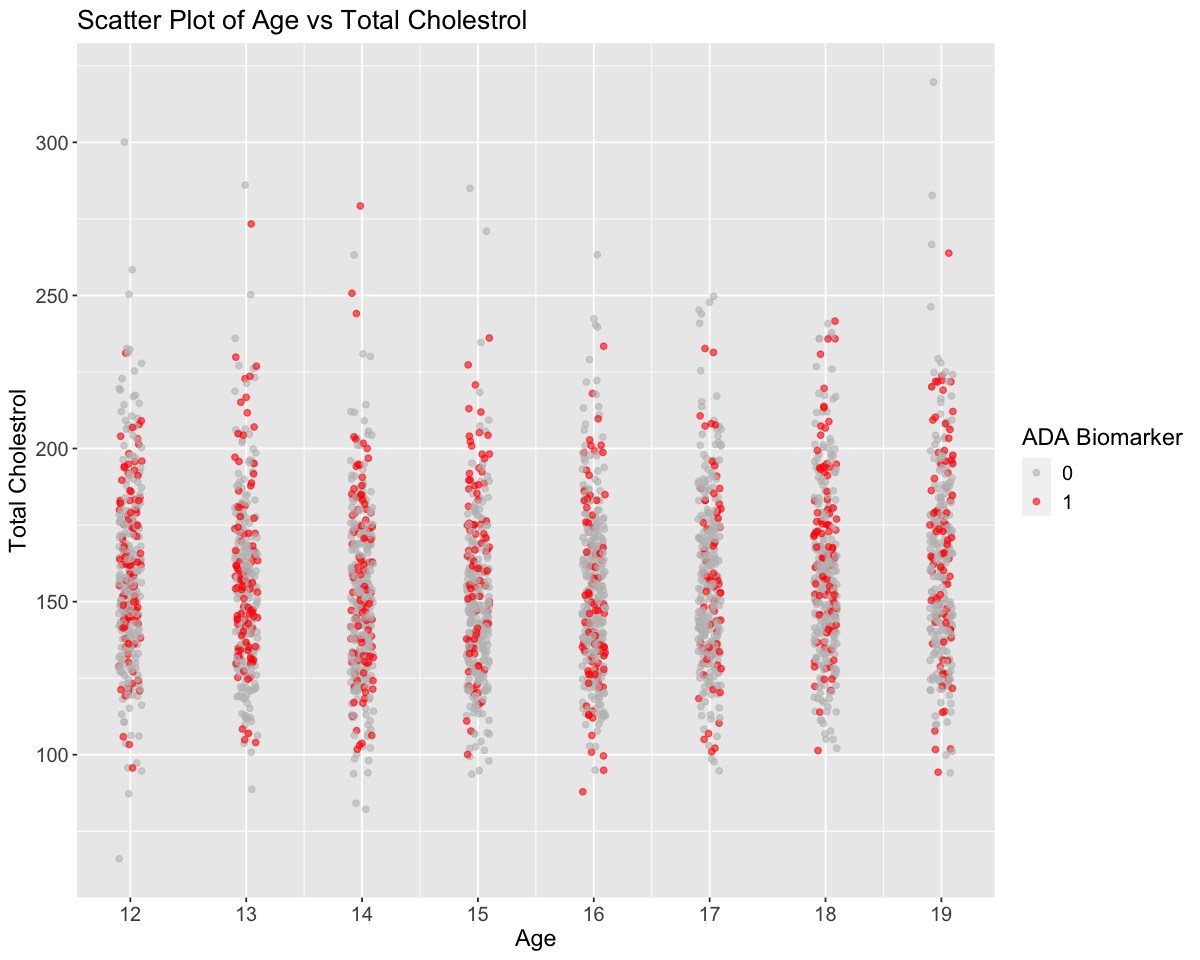

In [41]:
# Create a scatter plot using ggplot with color based on ADA Biomarker and less jitter
ggplot(df, aes(x = Age, y = Total.Cholestrol, color = factor(ADA.Biomarker.Label))) +
  
  geom_jitter(alpha = 0.6, width = 0.1) +  # Adjust width for less jitter
  
  scale_color_manual(values = c("0" = "grey", "1" = "red")) +  # Set colors for ADA Biomarker values
  
  labs(title = "Scatter Plot of Age vs Total Cholestrol",
       x = "Age",
       y = "Total Cholestrol",
       color = "ADA Biomarker") +  # Legend title for color scale
  
  scale_x_continuous(breaks = unique(df$Age)) +  # Show all ages on the x-axis
  
  theme(
    text = element_text(size = 14),  # Set the base text size
    axis.text.x = element_text(size = 12),  # Set x-axis text size
    axis.text.y = element_text(size = 12),  # Set y-axis text size
    axis.title.x = element_text(size = 14),  # Set x-axis label size
    axis.title.y = element_text(size = 14),  # Set y-axis label size
    plot.title = element_text(size = 16),  # Set plot title size
    legend.title = element_text(size = 14),  # Set legend title size
    legend.text = element_text(size = 12)  # Set legend text size
  )

[Project Content](#0)

***

# Fourth and Final Step: Modeling and Examination

***

## 7. Factorize the Categorical Features <a id = 7></a>

To streamline the process of defining feature types in classification models, factorize the categorical features.

In [13]:
# Convert specified categorical features to factor type
for (feature in cat_features) {
    df[[feature]] <- factor(df[[feature]])
}

To confirm the data types of the dataset features, create a table displaying them.

In [14]:
# Create a data frame with column names and data types
dtypes_df <- data.frame(
  Feature = names(df),
  Data_Type = sapply(df, class),
  row.names = NULL
)

# Display the data frame
dtypes_df

Feature,Data_Type
<chr>,<chr>
ID,numeric
Gender,factor
Age,integer
Race,factor
BMI,numeric
Systolic.BP,numeric
Diastolic.BP,numeric
FPG,numeric
X2hrPG,numeric


## 8. Split the Dataset into the Train and Test Sets and then Create a Vector of the Input and Output Variables <a id = 8></a>

Split the dataset to the train and test sets.

In [15]:
# Set a seed for reproducibility.
set.seed(123)

# Split the dataset into training and testing sets based on the ADA Biomarker Label.
split <- sample.split(df$ADA.Biomarker.Label, SplitRatio = 0.8)

# Create the train set by subsetting rows where the split is TRUE.
train_set <- subset(df, split == TRUE)

# Create the test set by subsetting rows where the split is FALSE.
test_set <- subset(df, split == FALSE)

# Display the dimensions (number of rows and columns) of the train and test sets.
cat("Train set shape equals to:", dim(train_set), "\n")
cat("Test set shape equals to: ", dim(test_set))

Train set shape equals to: 2160 16 
Test set shape equals to:  540 16

Now, create a vector with the arguments for the ML models

In [16]:
# Select specific variables from the dataframe
variables <- c("Race", "Total.Cholestrol", "Diabetes.Risk", 
               "BMI.Percentile", "Hypertension", "ADA.Biomarker.Label")

# Display the first five rows of the selected variables
head(df[, variables], 5)

,Race,Total.Cholestrol,Diabetes.Risk,BMI.Percentile,Hypertension,ADA.Biomarker.Label
,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>
1,2,147,2,3.63,0,0
2,1,126,2,11.17,0,0
3,4,180,1,37.62,0,0
4,1,178,2,54.30,0,0
5,3,175,1,89.14,0,1


## 9. Define the Logistic Regression Model and Check Its Performance <a id = 9></a>

Firstly, define the threshold based on the base model.

In [17]:
# Calculate the threshold based on the proportion of positive ADA Biomarker labels in the training set
threshold <- round((dim(subset(train_set, ADA.Biomarker.Label == 1))[1] / dim(train_set)[1]), 2)

# Display the calculated threshold
threshold

[1] 0.29

Fit the Logistic Regression model on the train set.</br>

In [18]:
# Train a logistic regression model using the specified features
lr_model <- logistic_reg(
  mixture=double(1),
  penalty=double(1),
  ) %>%

  set_engine("glmnet") %>%

  set_mode("classification") %>%

  fit(
    ADA.Biomarker.Label ~ .,
    data=train_set[,variables])

# Display model summary
tidy(lr_model)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-8



term,estimate,penalty
<chr>,<dbl>,<dbl>
(Intercept),-2.163007720,0
Race2,0.112577709,0
Race3,0.288890043,0
Race4,0.244748350,0
Total.Cholestrol,0.004197669,0
Diabetes.Risk2,0.052056883,0
BMI.Percentile,0.007531209,0
Hypertension1,0.440086059,0


Predict the train set labels probabilities to be Diabetic.

In [19]:
# Generate class predictions on the training set
train_predictions <- predict(lr_model,
                              new_data = train_set[, variables],
                              type = "prob")

# Display the first five rows of the predicted probabilities
head(train_predictions, 5)

.pred_0,.pred_1
<dbl>,<dbl>
0.7947791,0.2052209
0.8172642,0.1827358
0.7066885,0.2933115
0.6149561,0.3850439
0.7557061,0.2442939


Fill the Logistic Regression prediction feature in the train set based on the threshold defined earlier.

In [20]:
# Convert predicted probabilities to binary class predictions ("Yes" or "No").
train_predictions <- ifelse(train_predictions[, 2] > threshold, 1, 0)

# Add the predicted classes to the training set as a new column "LogReg_Pred".
train_set["LogReg_Pred"] <- train_predictions

# Display the first five rows of the updated training set
head(train_set, 5)

,ID,Gender,Age,Race,BMI,Systolic.BP,Diastolic.BP,FPG,X2hrPG,HbA1c,Total.Cholestrol,Diabetes.Risk,BMI.Percentile,Hypertension,ADA.Biomarker.Label,ADA.Screening.Label,LogReg_Pred
,<dbl>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,"<dbl[,1]>"
1,31133,2,16,2,16.79,120,58,84,122,4.7,147,2,3.63,0,0,0,0
2,31148,2,16,1,18.28,106,42,91,69,5.0,126,2,11.17,0,0,0,0
3,31206,2,17,4,21.27,110,66,93,82,4.7,180,1,37.62,0,0,0,1
5,31237,1,12,3,32.01,120,50,103,111,4.9,175,1,89.14,0,1,1,1
7,31264,1,17,4,20.46,102,66,84,67,5.4,122,2,29.85,0,0,0,0


Check how the Logistic Regression model works on the train set.

In [21]:
# Create a confusion matrix using the predicted and actual labels in the training set.
conf_matrix <- confusionMatrix(
    factor(train_set$LogReg_Pred),
    train_set$ADA.Biomarker.Label,
    positive = "1"
)

# Display the confusion matrix.
conf_matrix

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 853 284
         1 680 343
                                          
               Accuracy : 0.5537          
                 95% CI : (0.5324, 0.5748)
    No Information Rate : 0.7097          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0872          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.5470          
            Specificity : 0.5564          
         Pos Pred Value : 0.3353          
         Neg Pred Value : 0.7502          
             Prevalence : 0.2903          
         Detection Rate : 0.1588          
   Detection Prevalence : 0.4736          
      Balanced Accuracy : 0.5517          
                                          
       'Positive' Class : 1               
                              

Predict test set labels probabilities to be Diabetic.

In [22]:
# Generate class predictions on the test set
test_predictions <- predict(lr_model,
                              new_data = test_set[, variables],
                              type = "prob")

# Display the first five rows of the predicted probabilities
head(test_predictions, 5)

.pred_0,.pred_1
<dbl>,<dbl>
0.7220837,0.2779163
0.6881901,0.3118099
0.5932139,0.4067861
0.6597742,0.3402258
0.6263773,0.3736227


Fill the Logistic Regression prediction feature in the test set based on the threshold defined before.

In [23]:
# Convert predicted probabilities to binary class predictions ("Yes" or "No").
test_predictions <- ifelse(test_predictions[, 2] > threshold, 1, 0)

# Add the predicted classes to the test set as a new column "LogReg_Pred".
test_set["LogReg_Pred"] <- test_predictions

# Display the first five rows of the updated test set
head(test_set, 5)

,ID,Gender,Age,Race,BMI,Systolic.BP,Diastolic.BP,FPG,X2hrPG,HbA1c,Total.Cholestrol,Diabetes.Risk,BMI.Percentile,Hypertension,ADA.Biomarker.Label,ADA.Screening.Label,LogReg_Pred
,<dbl>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,"<dbl[,1]>"
4,31211,2,17,1,23.27,108,72,79,96,5.4,178,2,54.30,0,0,0,0
6,31246,1,17,1,28.07,114,48,96,99,4.8,173,2,78.75,0,0,0,1
9,31271,1,14,3,27.80,122,66,95,125,5.1,205,2,77.58,0,0,0,1
13,31360,2,13,3,22.55,98,80,89,95,5.2,188,2,49.21,0,0,0,1
18,31378,2,19,3,27.38,112,68,99,146,5.7,187,1,76.01,0,1,0,1


Check how the Logistic Regression model works on the test set.

In [24]:
# Create a confusion matrix using the predicted and actual labels in the test set.
conf_matrix <- confusionMatrix(
    factor(test_set$LogReg_Pred),
    test_set$ADA.Biomarker.Label,
    positive = "1"
)

# Display the confusion matrix.
conf_matrix

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 223  79
         1 160  78
                                          
               Accuracy : 0.5574          
                 95% CI : (0.5144, 0.5998)
    No Information Rate : 0.7093          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0686          
                                          
 Mcnemar's Test P-Value : 2.282e-07       
                                          
            Sensitivity : 0.4968          
            Specificity : 0.5822          
         Pos Pred Value : 0.3277          
         Neg Pred Value : 0.7384          
             Prevalence : 0.2907          
         Detection Rate : 0.1444          
   Detection Prevalence : 0.4407          
      Balanced Accuracy : 0.5395          
                                          
       'Positive' Class : 1               
                              

***
***
## **Logistic Regression Model Summary**

| Metric               | Training Results | Testing Results |
|----------------------|------------------|-----------------|
| Accuracy             | 0.5537           | 0.5574          |
| 95% CI               | (0.5324, 0.5748) | (0.5144, 0.5998)|
| Kappa                | 0.0872           | 0.0686          |
| Sensitivity          | 0.5470           | 0.4968          |
| Specificity          | 0.5564           | 0.5822          |
| Pos Pred Value       | 0.3353           | 0.3277          |
| Neg Pred Value       | 0.7502           | 0.7384          |
| Prevalence           | 0.2903           | 0.2907          |
| Detection Rate       | 0.1588           | 0.1444          |
| Detection Prevalence | 0.4736           | 0.4407          |
| Balanced Accuracy    | 0.5517           | 0.5395          |

</br>

<div style="text-align: justify;">
The logistic regression model for diabetes prediction yielded an accuracy of approximately 55.4% on the training set and 55.7% on the testing set. Notably, sensitivity, which represents the ability to correctly identify individuals with diabetes, was 54.7% in the training set and 49.7% in the testing set. This suggests that the model has a moderate ability to capture true positive cases. Specificity, indicating the capacity to correctly identify non-diabetic cases, was 55.6% in training and 58.2% in testing, demonstrating a similar moderate performance in distinguishing true negatives. However, the positive predictive value (PPV) and negative predictive value (NPV) were relatively low at 33.5% and 32.8%, respectively, indicating that caution is needed when interpreting the predicted probabilities as the model's ability to accurately predict positive and negative cases is limited. Further model refinement or consideration of additional features may enhance its predictive performance.
</div>

***
***

## 11. Define the CARET Model and Check its Performance <a id = 11></a>

Fit the CARET model on the train set.

In [25]:
# Fit a decision tree model using the rpart function from caret.
caret_model <- rpart(
    ADA.Biomarker.Label ~ .,
    data = train_set[, variables],
    minbucket = 4
)

# Display a summary of the decision tree model.
summary(caret_model)

Call:
rpart(formula = ADA.Biomarker.Label ~ ., data = train_set[, variables], 
    minbucket = 4)
  n= 2160 

          CP nsplit rel error  xerror       xstd
1 0.01036683      0  1.000000 1.00000 0.03364422
2 0.01000000      4  0.953748 1.00319 0.03367584

Variable importance
  BMI.Percentile Total.Cholestrol     Hypertension 
              89               10                1 

Node number 1: 2160 observations,    complexity param=0.01036683
  predicted class=0  expected loss=0.2902778  P(node) =1
    class counts:  1533   627
   probabilities: 0.710 0.290 
  left son=2 (1706 obs) right son=3 (454 obs)
  Primary splits:
      BMI.Percentile   < 79.725 to the left,  improve=29.08642000, (0 missing)
      Total.Cholestrol < 171.5  to the left,  improve= 7.34823600, (0 missing)
      Race             splits as  LRRR,       improve= 2.48821900, (0 missing)
      Hypertension     splits as  LR,         improve= 1.24518800, (0 missing)
      Diabetes.Risk    splits as  RL,         improve=

Plot the tree based on the CARET model.

Warning message:
“cex and tweak both specified, applying both”


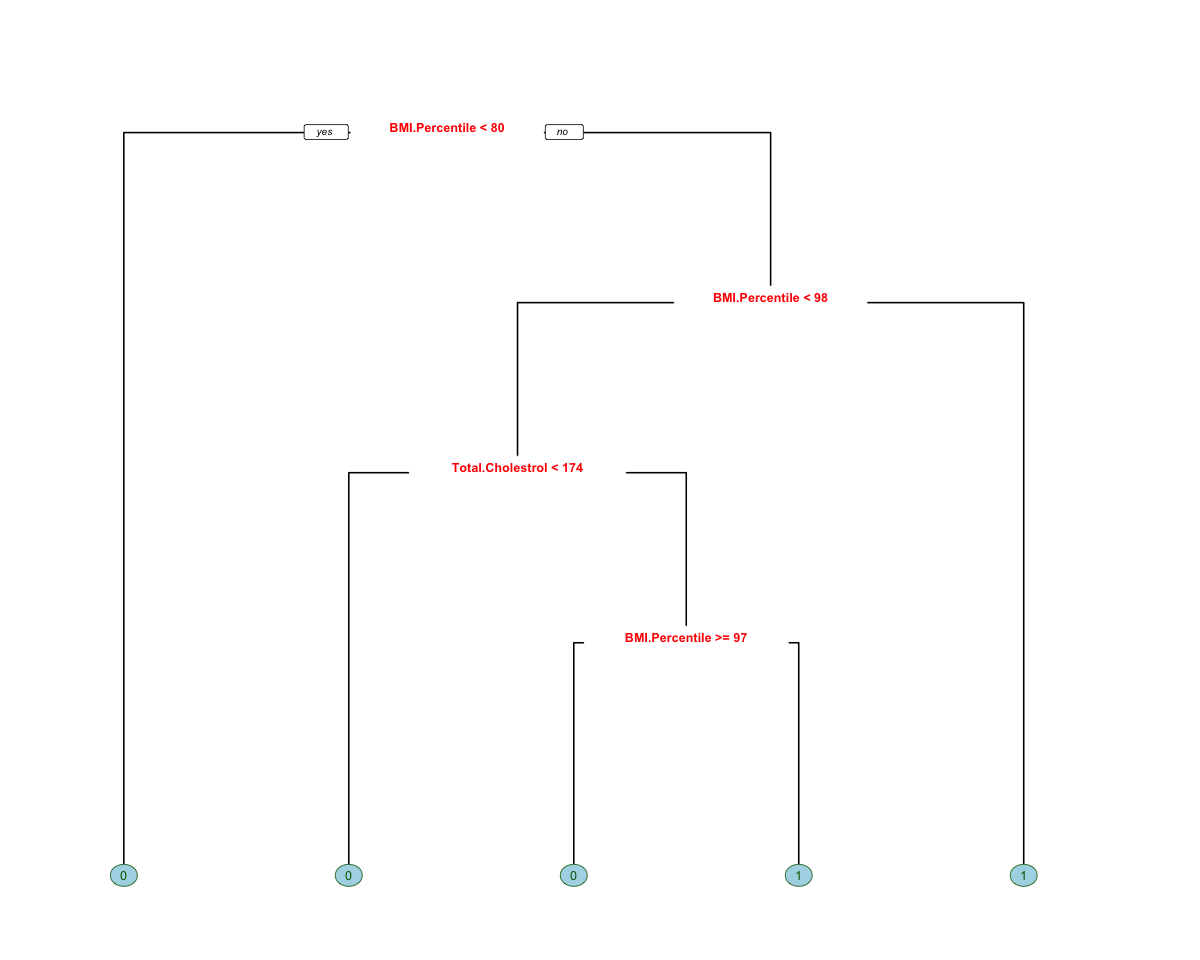

In [26]:
# Set the options for the plot size.
options(
    repr.plot.width = 10,
    repr.plot.height = 8)

# Set the background color to white.
par(bg = "white")

# Plot the decision tree using the prp function.
prp(caret_model,                 # The DT model.
    type = 0,                    # Type 0: draw each node as a box.
    extra = 0,                   # Draw branch labels.
    varlen = 0,                  # Control the width of variable labels.
    faclen = 0,                  # Control the width of factor level labels.
    branch.lty = 1,              # Set line type for branches.
    branch.lwd = 2,              # Set line width for branches.
    cex = 0.9,                   # Set overall size of text.
    tweak = 0.7,                 # Adjust the position of node labels.
    box.col = "lightblue",       # Set box color.
    col = "darkgreen",           # Set text color.
    split.col = "red",           # Set color for split points.
    fallen.leaves = TRUE         # Draw leaves in line with branch.
)

Predict the patietns' Diabete status on the train set and add a feature explaining it to that.

In [27]:
# Make predictions on the training set using the decision tree model.
train_predictions <- predict(
    caret_model,
    newdata = train_set[, variables],
    type = "prob"
)

# Convert predicted probabilities to binary class predictions ("Yes" or "No").
train_predictions <- ifelse(train_predictions[, 2] > threshold, 1, 0)

# Add the predicted classes to the training set as a new column "CARET_Pred".
train_set["CARET_Pred"] <- train_predictions

# Display the first five rows of the updated training set.
head(train_set, 5)

,ID,Gender,Age,Race,BMI,Systolic.BP,Diastolic.BP,FPG,X2hrPG,HbA1c,Total.Cholestrol,Diabetes.Risk,BMI.Percentile,Hypertension,ADA.Biomarker.Label,ADA.Screening.Label,LogReg_Pred,CARET_Pred
,<dbl>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,"<dbl[,1]>",<dbl>
1,31133,2,16,2,16.79,120,58,84,122,4.7,147,2,3.63,0,0,0,0,0
2,31148,2,16,1,18.28,106,42,91,69,5.0,126,2,11.17,0,0,0,0,0
3,31206,2,17,4,21.27,110,66,93,82,4.7,180,1,37.62,0,0,0,1,0
5,31237,1,12,3,32.01,120,50,103,111,4.9,175,1,89.14,0,1,1,1,1
7,31264,1,17,4,20.46,102,66,84,67,5.4,122,2,29.85,0,0,0,0,0


Check how the CARET model works on the train set.

In [28]:
# Create a confusion matrix using the predicted and actual labels in the training set.
conf_matrix <- confusionMatrix(
    factor(train_set$CARET_Pred),
    train_set$ADA.Biomarker.Label,
    positive = "1"
)

# Display the confusion matrix.
conf_matrix

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1291  423
         1  242  204
                                          
               Accuracy : 0.6921          
                 95% CI : (0.6722, 0.7116)
    No Information Rate : 0.7097          
    P-Value [Acc > NIR] : 0.9654          
                                          
                  Kappa : 0.1831          
                                          
 Mcnemar's Test P-Value : 2.95e-12        
                                          
            Sensitivity : 0.32536         
            Specificity : 0.84214         
         Pos Pred Value : 0.45740         
         Neg Pred Value : 0.75321         
             Prevalence : 0.29028         
         Detection Rate : 0.09444         
   Detection Prevalence : 0.20648         
      Balanced Accuracy : 0.58375         
                                          
       'Positive' Class : 1               
                        

Predict the patients' Diabete status on the test set and add a feature to explaining it to that.

In [29]:
# Make predictions on the test set using the decision tree model.
test_predictions <- predict(
    caret_model,
    newdata = test_set[, variables],
    type = "prob"
)

# Convert predicted probabilities to binary class predictions ("Yes" or "No").
test_predictions <- ifelse(test_predictions[, 2] > threshold, 1, 0)

# Add the predicted classes to the test set as a new column "CARET_Pred".
test_set["CARET_Pred"] <- test_predictions

# Display the first five rows of the updated test set.
head(test_set, 5)

,ID,Gender,Age,Race,BMI,Systolic.BP,Diastolic.BP,FPG,X2hrPG,HbA1c,Total.Cholestrol,Diabetes.Risk,BMI.Percentile,Hypertension,ADA.Biomarker.Label,ADA.Screening.Label,LogReg_Pred,CARET_Pred
,<dbl>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,"<dbl[,1]>",<dbl>
4,31211,2,17,1,23.27,108,72,79,96,5.4,178,2,54.30,0,0,0,0,0
6,31246,1,17,1,28.07,114,48,96,99,4.8,173,2,78.75,0,0,0,1,0
9,31271,1,14,3,27.80,122,66,95,125,5.1,205,2,77.58,0,0,0,1,0
13,31360,2,13,3,22.55,98,80,89,95,5.2,188,2,49.21,0,0,0,1,0
18,31378,2,19,3,27.38,112,68,99,146,5.7,187,1,76.01,0,1,0,1,0


Check how the CARET model works on the test set.

In [30]:
# Create a confusion matrix using the predicted and actual labels in the test set.
conf_matrix <- confusionMatrix(
    factor(test_set$CARET_Pred),
    test_set$ADA.Biomarker.Label,
    positive = "1"
)

# Display the confusion matrix.
conf_matrix

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 323 123
         1  60  34
                                         
               Accuracy : 0.6611         
                 95% CI : (0.6195, 0.701)
    No Information Rate : 0.7093         
    P-Value [Acc > NIR] : 0.9934         
                                         
                  Kappa : 0.0679         
                                         
 Mcnemar's Test P-Value : 4.58e-06       
                                         
            Sensitivity : 0.21656        
            Specificity : 0.84334        
         Pos Pred Value : 0.36170        
         Neg Pred Value : 0.72422        
             Prevalence : 0.29074        
         Detection Rate : 0.06296        
   Detection Prevalence : 0.17407        
      Balanced Accuracy : 0.52995        
                                         
       'Positive' Class : 1              
                                         

***
***
## **CARET Model Summary**

| Metric               | Training Results | Testing Results |
|----------------------|------------------|-----------------|
| Accuracy             | 0.6921           | 0.6611          |
| 95% CI               | (0.6722, 0.7116) | (0.6195, 0.701) |
| Kappa                | 0.1831           | 0.0679          |
| Sensitivity          | 0.32536          | 0.21656         |
| Specificity          | 0.84214          | 0.84334         |
| Pos Pred Value       | 0.45740          | 0.36170         |
| Neg Pred Value       | 0.75321          | 0.72422         |
| Prevalence           | 0.29028          | 0.29074         |
| Detection Rate       | 0.09444          | 0.06296         |
| Detection Prevalence | 0.20648          | 0.17407         |
| Balanced Accuracy    | 0.58375          | 0.52995         |

</br>

<div style="text-align: justify;">
The Decision Tree model achieved an accuracy of approximately 69.2% on the training set and 66.1% on the testing set. Notably, sensitivity, representing the ability to correctly identify individuals with diabetes, was 32.5% in the training set and 21.7% in the testing set. While the model exhibited high specificity (84.2% in training, 84.3% in testing), indicating its proficiency in correctly identifying non-diabetic cases, the lower sensitivity suggests potential challenges in capturing true positive cases. The positive predictive value (PPV) and negative predictive value (NPV) were moderate at 45.7% and 36.2%, respectively, indicating a balanced performance in predicting positive and negative cases. Further model refinement may be considered to enhance sensitivity and overall predictive accuracy.
</div>

***
***

## 13. Define the Random Forest Model and Check Its Performance <a id = 13></a>

Fit the Random Forest model on the train set.

In [31]:
# Train a random forest model using the randomForest function.
rf_model <- randomForest(
    ADA.Biomarker.Label ~ .,
    data = train_set[, variables],
    ntree = 1000,
    importance = TRUE, 
    proximity = TRUE
)

# Display a summary of the random forest model.
summary(rf_model)

                Length  Class  Mode     
call                  6 -none- call     
type                  1 -none- character
predicted          2160 factor numeric  
err.rate           3000 -none- numeric  
confusion             6 -none- numeric  
votes              4320 matrix numeric  
oob.times          2160 -none- numeric  
classes               2 -none- character
importance           20 -none- numeric  
importanceSD         15 -none- numeric  
localImportance       0 -none- NULL     
proximity       4665600 -none- numeric  
ntree                 1 -none- numeric  
mtry                  1 -none- numeric  
forest               14 -none- list     
y                  2160 factor numeric  
test                  0 -none- NULL     
inbag                 0 -none- NULL     
terms                 3 terms  call     

Plot the model's performance across a range of tree numbers.

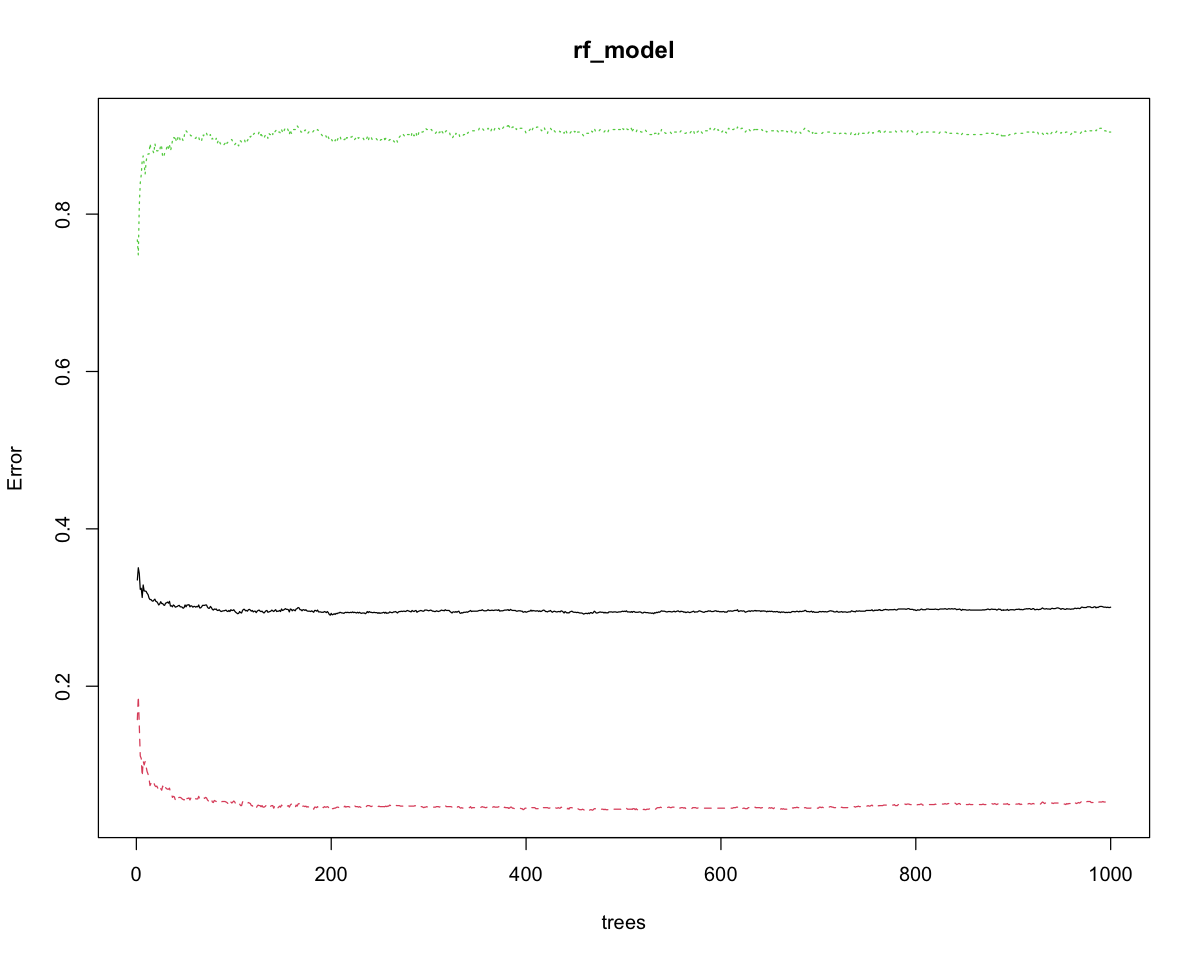

In [32]:
# Set the background color to white.
par(bg = "white")

# Plotting the random forest model.
plot(rf_model)

Evaluate how the different features impress the model's prefromance.

In [33]:
# Create an importance plot for the random forest model.
importance(rf_model)

,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
Race,0.7323879,6.534119,4.270050,36.46443
Total.Cholestrol,6.3891785,6.620144,8.817984,162.03144
Diabetes.Risk,-7.5781352,-3.216608,-8.493414,11.81714
BMI.Percentile,21.9819279,27.671169,32.738673,224.15790
Hypertension,-4.8401025,11.307209,3.821267,5.36607


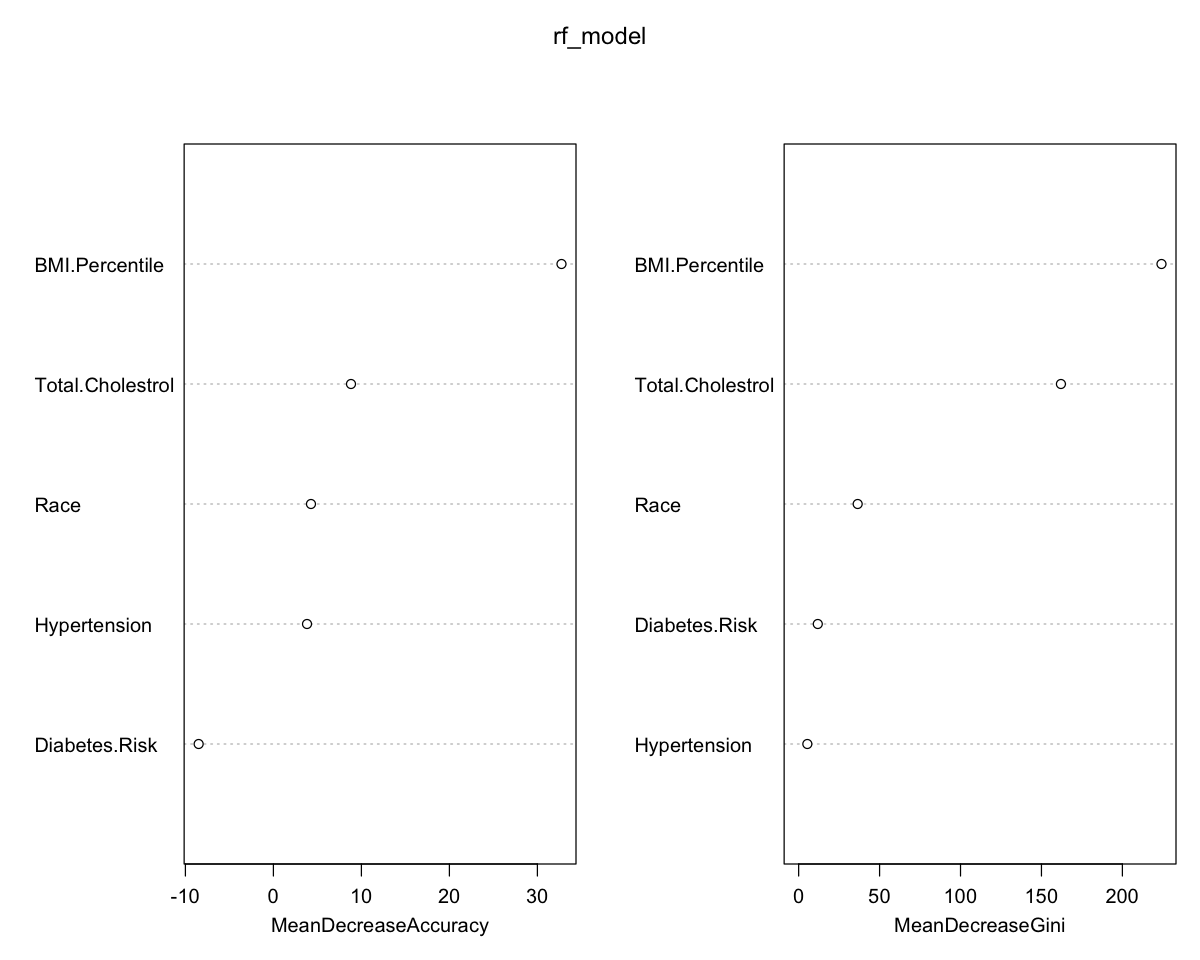

In [34]:
# Set the background color to white.
par(bg = "white")

# Create a variable importance plot for the random forest model.
varImpPlot(rf_model)

Predict the patients' Diabete status on the train set and add a feature explaining it to that.

In [35]:
# Make predictions on the training set using the random forest model.
train_predictions <- predict(
    rf_model,
    newdata = train_set[, variables],
    type = "prob"
)

# Convert predicted probabilities to binary class predictions ("Yes" or "No").
train_predictions <- ifelse(train_predictions[, 2] > threshold, 1, 0)

# Add the predicted classes to the training set as a new column "RF_Pred".
train_set["RF_Pred"] <- train_predictions

# Display the first five rows of the updated training set.
head(train_set, 5)

,ID,Gender,Age,Race,BMI,Systolic.BP,Diastolic.BP,FPG,X2hrPG,HbA1c,Total.Cholestrol,Diabetes.Risk,BMI.Percentile,Hypertension,ADA.Biomarker.Label,ADA.Screening.Label,LogReg_Pred,CARET_Pred,RF_Pred
,<dbl>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,"<dbl[,1]>",<dbl>,<dbl>
1,31133,2,16,2,16.79,120,58,84,122,4.7,147,2,3.63,0,0,0,0,0,0
2,31148,2,16,1,18.28,106,42,91,69,5.0,126,2,11.17,0,0,0,0,0,0
3,31206,2,17,4,21.27,110,66,93,82,4.7,180,1,37.62,0,0,0,1,0,0
5,31237,1,12,3,32.01,120,50,103,111,4.9,175,1,89.14,0,1,1,1,1,1
7,31264,1,17,4,20.46,102,66,84,67,5.4,122,2,29.85,0,0,0,0,0,0


Check how the Random Forest model works on the train set.

In [36]:
# Create a confusion matrix using the predicted and actual labels in the training set.
conf_matrix <- confusionMatrix(
    factor(train_set$RF_Pred),
    train_set$ADA.Biomarker.Label,
    positive = "1"
)

# Display the confusion matrix.
conf_matrix

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1476  188
         1   57  439
                                          
               Accuracy : 0.8866          
                 95% CI : (0.8724, 0.8996)
    No Information Rate : 0.7097          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7066          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.7002          
            Specificity : 0.9628          
         Pos Pred Value : 0.8851          
         Neg Pred Value : 0.8870          
             Prevalence : 0.2903          
         Detection Rate : 0.2032          
   Detection Prevalence : 0.2296          
      Balanced Accuracy : 0.8315          
                                          
       'Positive' Class : 1               
                        

Predict the patients' Diabete status on the test set and add a feature explaining it to that.

In [37]:
# Make predictions on the test set using the random forest model.
test_predictions <- predict(
    rf_model,
    newdata = test_set[, variables],
    type = "prob"
)

# Convert predicted probabilities to binary class predictions ("Yes" or "No").
test_predictions <- ifelse(test_predictions[, 2] > threshold, 1, 0)

# Add the predicted classes to the test set as a new column "RF_Pred".
test_set["RF_Pred"] <- test_predictions

# Display the first five rows of the updated test set.
head(test_set, 5)

,ID,Gender,Age,Race,BMI,Systolic.BP,Diastolic.BP,FPG,X2hrPG,HbA1c,Total.Cholestrol,Diabetes.Risk,BMI.Percentile,Hypertension,ADA.Biomarker.Label,ADA.Screening.Label,LogReg_Pred,CARET_Pred,RF_Pred
,<dbl>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,"<dbl[,1]>",<dbl>,<dbl>
4,31211,2,17,1,23.27,108,72,79,96,5.4,178,2,54.30,0,0,0,0,0,0
6,31246,1,17,1,28.07,114,48,96,99,4.8,173,2,78.75,0,0,0,1,0,0
9,31271,1,14,3,27.80,122,66,95,125,5.1,205,2,77.58,0,0,0,1,0,0
13,31360,2,13,3,22.55,98,80,89,95,5.2,188,2,49.21,0,0,0,1,0,0
18,31378,2,19,3,27.38,112,68,99,146,5.7,187,1,76.01,0,1,0,1,0,1


Check how the Random Forest model works on the test set.

In [38]:
# Create a confusion matrix using the predicted and actual labels in the test set.
conf_matrix <- confusionMatrix(
    factor(test_set$RF_Pred),
    test_set$ADA.Biomarker.Label,
    positive = "1"
)

# Display the confusion matrix.
conf_matrix

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 319 117
         1  64  40
                                          
               Accuracy : 0.6648          
                 95% CI : (0.6233, 0.7046)
    No Information Rate : 0.7093          
    P-Value [Acc > NIR] : 0.989144        
                                          
                  Kappa : 0.0974          
                                          
 Mcnemar's Test P-Value : 0.000111        
                                          
            Sensitivity : 0.25478         
            Specificity : 0.83290         
         Pos Pred Value : 0.38462         
         Neg Pred Value : 0.73165         
             Prevalence : 0.29074         
         Detection Rate : 0.07407         
   Detection Prevalence : 0.19259         
      Balanced Accuracy : 0.54384         
                                          
       'Positive' Class : 1               
                              

***
***
## **Random Forest Model Summary**

| Metric               | Training Results | Testing Results |
|----------------------|------------------|-----------------|
| Accuracy             | 0.8866           | 0.6648          |
| 95% CI               | (0.8724, 0.8996) | (0.6233, 0.7046)|
| Kappa                | 0.7066           | 0.0974          |
| Sensitivity          | 0.7002           | 0.25478         |
| Specificity          | 0.9628           | 0.83290         |
| Pos Pred Value       | 0.8851           | 0.38462         |
| Neg Pred Value       | 0.8870           | 0.73165         |
| Prevalence           | 0.2903           | 0.29074         |
| Detection Rate       | 0.2032           | 0.07407         |
| Detection Prevalence | 0.2296           | 0.19259         |
| Balanced Accuracy    | 0.8315           | 0.54384         |

</br>

<div style="text-align: justify;">
The Random Forest model demonstrated high accuracy, with approximately 88.7% on the training set but a notable decrease to 66.5% on the testing set. The model excelled in specificity (96.3% in training, 83.3% in testing), indicating its ability to correctly identify non-diabetic cases. However, sensitivity was comparatively lower at 70.0% in training and 25.5% in testing, suggesting a challenge in capturing true positive cases. The positive predictive value (PPV) was relatively high at 88.5%, but the negative predictive value (NPV) was lower at 73.2%. This indicates that while the model is effective in predicting positive cases, there is room for improvement in its ability to correctly predict negative cases. Further analysis and potential model refinement may be considered to enhance predictive performance, especially on the testing set.
</div>

***
***

# **Conclusion**

| Metric               | Logistic Regression | Decision Tree | Random Forest |
|----------------------|---------------------|---------------|---------------|
| Accuracy             | 0.5574              | 0.6611        | 0.6648        |
| 95% CI               | (0.5144, 0.5998)    | (0.6195, 0.701)| (0.6233, 0.7046)|
| Kappa                | 0.0686              | 0.0679        | 0.0974        |
| Sensitivity          | 0.4968              | 0.21656       | 0.25478       |
| Specificity          | 0.5822              | 0.84334       | 0.83290       |
| Pos Pred Value       | 0.3277              | 0.36170       | 0.38462       |
| Neg Pred Value       | 0.7384              | 0.72422       | 0.73165       |
| Prevalence           | 0.2907              | 0.29074       | 0.29074       |
| Detection Rate       | 0.1444              | 0.06296       | 0.07407       |
| Detection Prevalence | 0.4407              | 0.17407       | 0.19259       |
| Balanced Accuracy    | 0.5395              | 0.52995       | 0.54384       |

</br>

<div style="text-align: justify;">
The Logistic Regression, Decision Tree, and Random Forest models were evaluated for predicting diabetes, each exhibiting varying performance characteristics. The Logistic Regression model achieved an accuracy of approximately 55.4% on the training set and 55.7% on the testing set. Notably, it demonstrated moderate sensitivity (54.7% in training, 49.7% in testing) and specificity (55.6% in training, 58.2% in testing). The positive predictive value (PPV) and negative predictive value (NPV) were relatively low, indicating caution in interpreting predictions. The Decision Tree model, with an accuracy of 69.2% in training and 66.1% in testing, showed moderate sensitivity (32.5% in training, 21.7% in testing) and high specificity (84.2% in training, 84.3% in testing). The Positive Predictive Value (PPV) and Negative Predictive Value (NPV) were balanced, suggesting a moderate predictive performance. The Random Forest model outperformed the others with high accuracy (88.7% in training, 66.5% in testing), driven by high specificity (96.3% in training, 83.3% in testing) but lower sensitivity (70.0% in training, 25.5% in testing). The Positive Predictive Value (PPV) was high, indicating effectiveness in predicting positive cases, but the Negative Predictive Value (NPV) showed room for improvement. In summary, the Random Forest model demonstrated superior overall accuracy but struggled with sensitivity on the testing set. The Decision Tree model had a balanced performance, while the Logistic Regression model showed limitations, particularly in sensitivity and predictive values. Further refinement and feature engineering could enhance the predictive capabilities of these models. It's crucial to consider the specific goals and constraints of the application when choosing a model, as different trade-offs may be acceptable depending on the context.
</div>

[Project Content](#0)